# SHOP CUSTOMER ANALYSIS

Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

# Columns description

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Columns

CustomerID:Uniquley Identfying each customer

Gender:Gender of the customer

Age: Age of the customer

Annual Income ($):In dollars

Spending Score (1-100): Score assigned by the shop, based on customer behavior and spending nature.

Profession:Field of Work

Work Experience: In years

Family Size:

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# Exploratory data Analysis(EDA)

In [5]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [6]:
df.shape

(2000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [9]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

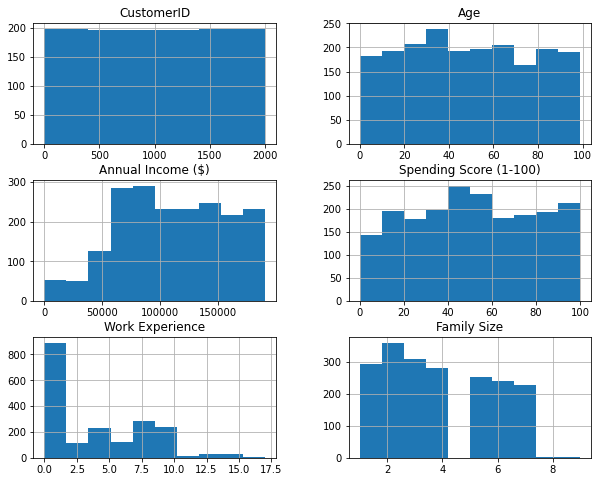

In [12]:
df.hist(figsize=(10,8));

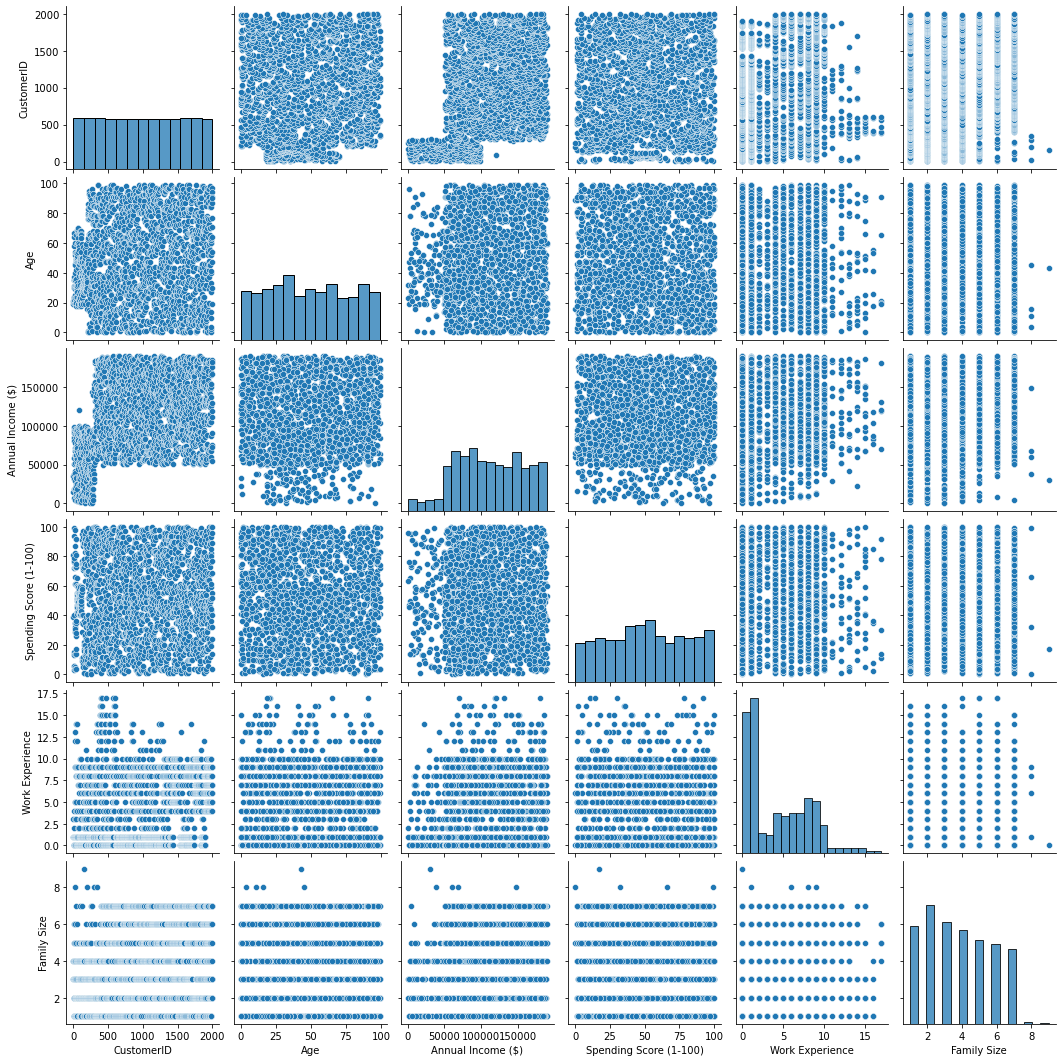

In [13]:
sns.pairplot(df);

In [14]:
df.duplicated().sum()

0

Checking for outliers

In [15]:

# calculate the IQR
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

# calculate the upper and lower bounds
upper_bound = q3 + 1.5 * iqr 
lower_bound = q1 - 1.5 * iqr

# identify outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# calculate the sum of the outliers
outlier_sum = outliers['Age'].sum()

# print the outliers and the sum of the outliers
print('Outliers:\n', outliers)
print('Sum of Outliers:', outlier_sum)


Outliers:
 Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income ($), Spending Score (1-100), Profession, Work Experience, Family Size]
Index: []
Sum of Outliers: 0


In [16]:

# calculate the IQR
q1 = df['Annual Income ($)'].quantile(0.25)
q3 = df['Annual Income ($)'].quantile(0.75)
iqr = q3 - q1

# calculate the upper and lower bounds
upper_bound = q3 + 1.5 * iqr 
lower_bound = q1 - 1.5 * iqr

# identify outliers
outliers = df[(df['Annual Income ($)'] < lower_bound) | (df['Annual Income ($)'] > upper_bound)]

# calculate the sum of the outliers
outlier_sum = outliers['Annual Income ($)'].sum()

# print the outliers and the sum of the outliers
print('Outliers:\n', outliers)
print('Sum of Outliers:', outlier_sum)

Outliers:
 Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income ($), Spending Score (1-100), Profession, Work Experience, Family Size]
Index: []
Sum of Outliers: 0


Not Outliers

In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


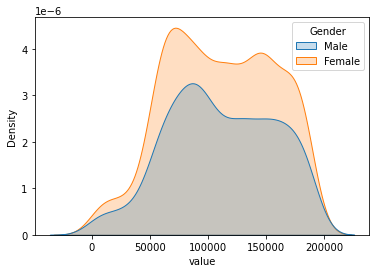

In [21]:
melted_data = pd.melt(df, id_vars=['Gender'], value_vars=['Annual Income ($)'])
sns.kdeplot(data=melted_data, x='value', shade=True, hue='Gender');

Saving the cleaned dataset

In [17]:
df.to_csv('cleaned_dataset.csv', index=False)